### Name: Anjum Rohra

# Overview

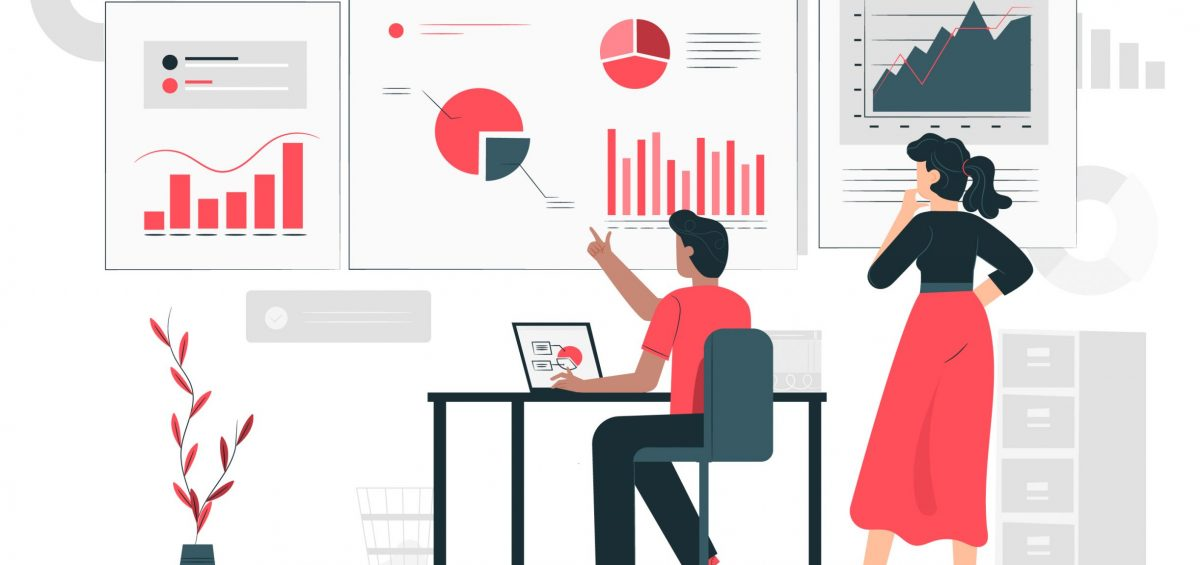

Being a popular finance journalist of Europe, everyone is waiting for the IT Salary Survey report you release every 3 years. The IT Sector is booming and the younger aspirants keep themselves updated with the trends by the beautiful visualizations your report contains. 

Given the survey data from 2018 - 2020, it’s time to put your creative hat on and lay out insightful visualizations for the masses.

### Importing the required libraries

In [47]:
import plotly.express as px
import pandas as pd

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Output, Input

### Importing data

In [48]:
data_18 = pd.read_csv('Survey_2018.csv')
data_19 = pd.read_csv('Survey_2019.csv')
data_20 = pd.read_csv('Survey_2020.csv')

### Imputing the missing values

#### 2020 imputation

In [49]:
data_20 = data_20.rename(columns = {'Position ': 'Position'})

In [50]:
data_20.isnull().sum()

Timestamp                                                                                                                    0
Age                                                                                                                         27
Gender                                                                                                                      10
City                                                                                                                         0
Position                                                                                                                     6
Total years of experience                                                                                                   16
Years of experience in Germany                                                                                              32
Seniority level                                                                                                

In [51]:
data_20['Age'].fillna(data_20['Age'].mean(), inplace=True)

In [52]:
data_20['Gender'].fillna('Male', inplace=True)

In [53]:
data_20['Position'].fillna('Software Engineer', inplace=True)

In [54]:
data_20['Position'].replace({'Account Managet': 'Account Manager', 'agile master ':'Agile Coach', 'Data analyst ':'Data Analyst', 'Data Analyst ':'Data Analyst', 'Dana Analyst':'Data Analyst', 'Fullstack engineer, ну или Software engineer': 'Fullstack engineer, Software engineer', 'Software Architekt':'Software Architect', 'DatabEngineer':'Data Engineer', 'data engineer':'Data Engineer', 'support engineer':'Support Engineer', 'Systemadministrator':'System Administrator', 'Team lead':'Team Lead', 'Tech Leader':'Tech Lead', 'Technical Lead':'Tech Lead', 'Security engineer':'Security Engineer' },
                                   inplace=True)

In [55]:
data_20['Your main technology / programming language'].replace({'Javascript / Typescript':'JavaScript/TypeScript','JavaScript / TypeScript':'JavaScript/TypeScript','TypeScript, JavaScript':'JavaScript/TypeScript','JavaScript/Typescript':'JavaScript/TypeScript','JavaScript / typescript':'JavaScript/TypeScript','Javascript/Typescript':'JavaScript/TypeScript','JavaScript, TypeScript':'JavaScript/TypeScript','kotlin':'Kotlin','Javascript':'JavaScript','JavaScript ':'JavaScript','Javascript ':'JavaScript','javascript':'JavaScript','Typescript':'TypeScript','typescript':'TypeScript','Typescript ':'TypeScript','python':'Python','Python ':'Python','pythin':'Python','python ':'Python','Pyrhon':'Python','scala':'Scala','Java / Scala':'Java/Scala','python, scala':'Scala / Python','C, C++':'C/C++','C++/c':'C/C++','C++, C#':'C/C++','c/c++':'C/C++','--':'Java','-':'Java'},
                                   inplace=True)

In [56]:
data_20['Your main technology / programming language'].fillna('Java', inplace=True)

In [57]:
data_20['Total years of experience'].replace({'1,5':'1.5','2,5':'2.5','1 (as QA Engineer) / 11 in total':'11','15, thereof 8 as CTO':'15','6 (not as a data scientist, but as a lab scientist)':'6','383':'38.3','less than year':'0'}, inplace=True)

In [58]:
data_20['Total years of experience'].mode()

0    10
dtype: object

In [59]:
data_20['Total years of experience'].unique()

array(['5', '7', '12', '4', '17', '6', '8', '15', '2', '25', nan, '14',
       '11', '18', '13', '30', '10', '3', '40', '26', '23', '9', '19',
       '20', '5.5', '22', '16', '0.8', '1', '1.5', '6.5', '21', '7.5',
       '2.5', '28', '29', '24', '0', '4.5', '27', '31', '38.3', '3.5'],
      dtype=object)

In [60]:
data_20['Total years of experience']=data_20['Total years of experience'].astype('float64')

In [61]:
data_20['Total years of experience'].median()

8.0

In [62]:
data_20['Total years of experience'].fillna(data_20['Total years of experience'].median(), inplace=True)

In [63]:
data_20['Years of experience in Germany'].unique()

array(['3', '4', '6', '1', '0.4', '2', '11', nan, '5', '9', '30', '7',
       '15', '10', '18', '0', '8', '2.5', '1,5', '1.5', '0.5', '13', '14',
       '4,5', '3.5', '0.8', '1,7', '12', '3,5', '20', '0.9', '25', '< 1',
       '0.25', '4 (in Switzerland), 0 (in Germany)', '16', '17',
       '4 month', '19', '2,5', '0,5', '26', '3 months', '4.5', '0.1',
       '2.6', '3 (in Poland)', '<1', '⁰', '0,3', '-',
       '6 (not as a data scientist, but as a lab scientist)', '0.2',
       'less than year'], dtype=object)

In [64]:
data_20['Years of experience in Germany'].replace({'⁰':'0','-':'10','< 1':'<1','1,7':'1.7','2,5':'2.5','0,5':'0.5','1,5':'1.5','4,5':'4.5','3,5':'3.5','4 month':'4 months','less than year':'<1'}, inplace=True)

In [65]:
data_20['Years of experience in Germany'].mode()

0    2
dtype: object

In [66]:
data_20['Years of experience in Germany'].fillna('2', inplace=True)

In [67]:
data_20['Years of experience in Germany'].unique()

array(['3', '4', '6', '1', '0.4', '2', '11', '5', '9', '30', '7', '15',
       '10', '18', '0', '8', '2.5', '1.5', '0.5', '13', '14', '4.5',
       '3.5', '0.8', '1.7', '12', '20', '0.9', '25', '<1', '0.25',
       '4 (in Switzerland), 0 (in Germany)', '16', '17', '4 months', '19',
       '26', '3 months', '0.1', '2.6', '3 (in Poland)', '0,3',
       '6 (not as a data scientist, but as a lab scientist)', '0.2'],
      dtype=object)

In [68]:
data_18.drop('Timestamp',axis=1,inplace=True)
data_19.drop('Zeitstempel',axis=1,inplace=True)
data_20.drop('Timestamp',axis=1,inplace=True)

In [69]:
data_20['Seniority level'].fillna('Senior', inplace=True)
data_20['Other technologies/programming languages you use often'].fillna('Javascript / Typescript', inplace=True)
data_20['Yearly bonus + stocks in EUR'].fillna('0', inplace=True)
data_20['Annual bonus+stocks one year ago. Only answer if staying in same country'].fillna('0', inplace=True)
data_20['Number of vacation days'].fillna('30', inplace=True)
data_20['Employment status'].fillna('Full-time employee', inplace=True)
data_20['Contract duration'].fillna('Unlimited contract', inplace=True)
data_20['Main language at work'].fillna('English', inplace=True)
data_20['Company size'].fillna('1000+', inplace=True)
data_20['Company type'].fillna('Product', inplace=True)
data_20['Have you lost your job due to the coronavirus outbreak?'].fillna('No', inplace=True)
data_20['Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR'].fillna('0', inplace=True)
data_20['Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country'].fillna(data_20['Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country'].median(), inplace=True)
data_20['Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week'].fillna(data_20['Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week'].mean(), inplace=True)

In [70]:
data_20.isnull().sum()

Age                                                                                                                        0
Gender                                                                                                                     0
City                                                                                                                       0
Position                                                                                                                   0
Total years of experience                                                                                                  0
Years of experience in Germany                                                                                             0
Seniority level                                                                                                            0
Your main technology / programming language                                                                                0


#### 2018 imputation

In [71]:
data_18.isnull().sum()

Age                                    93
Gender                                 14
City                                   29
Position                               28
Years of experience                    33
Your level                             22
Current Salary                         15
Salary one year ago                   169
Salary two years ago                  302
Are you getting any Stock Options?     23
Main language at work                  15
Company size                           15
Company type                           35
dtype: int64

In [72]:
data_18['Gender'].fillna('M', inplace=True)
data_18['City'].fillna('Berlin', inplace=True)
data_18['Position'].fillna('Java Developer', inplace=True)
data_18['Your level'].fillna('Senior', inplace=True)
data_18['Are you getting any Stock Options?'].fillna('No', inplace=True)
data_18['Main language at work'].fillna('English', inplace=True)
data_18['Company size'].fillna('100-1000', inplace=True)
data_18['Company type'].fillna('Product', inplace=True)
data_18['Age'].fillna(data_18['Age'].mean(), inplace=True)
data_18['Years of experience'].fillna(data_18['Years of experience'].mean(), inplace=True)
data_18['Current Salary'].fillna(data_18['Current Salary'].mean(), inplace=True)
data_18['Salary one year ago'].fillna(data_18['Salary one year ago'].mean(), inplace=True)
data_18['Salary two years ago'].fillna(data_18['Salary two years ago'].mean(), inplace=True)

In [73]:
data_18['Gender'].value_counts()

M    660
F    105
Name: Gender, dtype: int64

In [74]:
data_18['Gender'].replace({'M':'Male','F':'Female'}, inplace=True)

In [75]:
data_18['Company type'].unique()

array(['Product', 'Ecom retailer', 'Insurance', 'Startup', 'Agency',
       'Big Tech', 'Consultancy', 'Corporation', 'Outsource', 'Industry',
       'E-Commerce firm', 'Consulting',
       'Internal development for a non-IT company',
       'Personaldienstleister', 'ipo', 'e-commerce',
       'Product and Projects', 'E-Commerce', 'Development',
       'Consulting Company', 'IT Dienstleistungen ', 'Manufacturing',
       'Stock market ', 'telecom operator', 'Ecommerce', 'Outsourcing',
       'Outsorce', 'consulting', 'GmbH', 'IT Consulting ',
       'IT Consultancy ', 'IT Service Provider', 'non-IT, manufacturing',
       'Bank ', 'IT-Beratung', 'Technology Consulting', 'outsource',
       'IT Consultants', 'Hochschule/university', 'ISP', 'Fin Tech',
       'Blockchain technology', 'Retail', 'Consult',
       'Project-based software development', 'Automotive', 'OEM',
       'Consulting (banking)', 'IT Consulting'], dtype=object)

In [76]:
data_18['Company type'].replace({'Consulting Company':'Consulting','Consultancy':'Consulting','Consulting Company':'Consulting','Consult':'Consulting','IT Consulting ':'IT Consulting','IT Consultancy ':'IT Consulting','IT Consultants':'IT Consulting','Outsorce':'Outsourcing','Outsource':'Outsourcing','E-Commerce firm':'E-Commerce','e-commerce':'E-Commerce','Ecommerce':'E-Commerce'}, inplace=True)

In [77]:
data_18.isnull().sum()

Age                                   0
Gender                                0
City                                  0
Position                              0
Years of experience                   0
Your level                            0
Current Salary                        0
Salary one year ago                   0
Salary two years ago                  0
Are you getting any Stock Options?    0
Main language at work                 0
Company size                          0
Company type                          0
dtype: int64

#### 2019 imputation

In [78]:
data_19.drop('0',axis=1,inplace=True)

In [79]:
data_19.isnull().sum()

Age                                                                                                     109
Gender                                                                                                    0
City                                                                                                      0
Seniority level                                                                                          15
Position (without seniority)                                                                              1
Years of experience                                                                                       0
Your main technology / programming language                                                              14
Yearly brutto salary (without bonus and stocks)                                                           1
Yearly bonus                                                                                            461
Yearly stocks               

In [80]:
data_19['Seniority level'].fillna('Senior', inplace=True)
data_19['Position (without seniority)'].fillna('Backend Developer', inplace=True)
data_19['Your main technology / programming language'].fillna('Python', inplace=True)
data_19['Main language at work'].fillna('English', inplace=True)
data_19['Company name '].fillna('Zalando', inplace=True)
data_19['Company size'].fillna('100-1000', inplace=True)
data_19['Company type'].fillna('Product', inplace=True)
data_19['Contract duration'].fillna('unlimited', inplace=True)
data_19['Company business sector'].fillna('Commerce', inplace=True)
data_19['Age'].fillna(data_19['Age'].mean(), inplace=True)
data_19['Years of experience'].fillna(data_19['Years of experience'].mean(), inplace=True)
data_19['Yearly brutto salary (without bonus and stocks)'].fillna(data_19['Yearly brutto salary (without bonus and stocks)'].mean(), inplace=True)
data_19['Yearly bonus'].fillna(data_19['Yearly bonus'].mean(), inplace=True)
data_19['Yearly stocks'].fillna(data_19['Yearly stocks'].mean(), inplace=True)
data_19['Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country'].fillna(data_19['Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country'].mean(), inplace=True)
data_19['Yearly bonus one year ago. Only answer if staying in same country'].fillna(data_19['Yearly bonus one year ago. Only answer if staying in same country'].mean(), inplace=True)
data_19['Yearly stocks one year ago. Only answer if staying in same country'].fillna(data_19['Yearly stocks one year ago. Only answer if staying in same country'].mean(), inplace=True)
data_19['Number of vacation days'].fillna(data_19['Number of vacation days'].mean(), inplace=True)
data_19['Number of home office days per month'].fillna(data_19['Number of home office days per month'].mean(), inplace=True)

In [81]:
data_19['Seniority level'].value_counts()

Senior       602
Middle       272
Junior        73
Lead          35
Head           6
Principal      3
Name: Seniority level, dtype: int64

In [82]:
data_19['Position (without seniority)'].unique()

array(['Fullstack Developer', 'Backend Developer', 'Mobile Developer',
       'Embedded Developer', 'Machine Learning Engineer', 'Manager',
       'DevOps', 'Designer (UI, UX)', 'Frontend Developer',
       'Data Scientist', 'Data Engineer', 'QA', 'Software Architect',
       'Business Analyst', 'Localization', 'Support',
       'System Administrator', 'Product Manager', 'SAP Consultant', 'SRE',
       'Software Engineer', 'CTO (CEO, CFO)', 'Database Developer (DBA)',
       'Desktop/Unity3D Developer', 'Recruiter ', 'Researcher',
       'Cloud Platform Engineer', 'Lawyer ', 'IT Security',
       'Sales Engineer', 'Mainframe', 'Network Engineer', 'NLP Engineer',
       'Head of AI', 'Head of Engineering', 'Tech Lead',
       'Crypto Developer', 'Modelling Specialist', 'RPA developer',
       'Platform Engineer', 'UX Researcher', 'Game Developer',
       'Backend Developer & Team Lead', 'support', 'DevOps Manager',
       'Solution Architect', 'Scrum Master', 'Data Analyst', 'Desktop',


In [83]:
data_19['Your main technology / programming language'].unique()

array(['PHP', 'Python', 'Kotlin', 'C/C++', 'Java', 'Not Relevant',
       'Swift', 'Javascript / Typescript', 'Go', 'AWS', 'Kubernetes',
       'Ruby', '.NET', 'Scala', 'Clojure', 'Yaml',
       'Linux-Stack, Networking', 'Azure', 'Elixir', 'Multiple',
       'Objective-C', 'Microsoft, Vmware', 'Google Cloud', 'SAP / ABAP',
       'SQL', 'R', 'SAS', 'Powershell', 'Rust', 'Solidity', 'ASM',
       'Cobol', 'Perl', 'Cisco', 'Hadoop', 'Erlang', 'Unity', 'HR', 'K8S',
       'ABAP', 'PostgreSQL', 'Openstack'], dtype=object)

In [84]:
data_19['Main language at work'].unique()

array(['English', 'Deutsch', 'English+Deutsch', 'Russian', 'Spanish',
       'French', 'Italian', 'Dutch', 'Polish+English', 'Polish',
       'Ukrainian'], dtype=object)

In [85]:
data_19['Company name '].unique()

array(['Zalando', 'Auto1', 'Luxoft', 'Bonial International GmbH',
       'Football app', 'Digital service for one-man-business craftsmen',
       'Koerber Digital', 'Omio', 'New Yorker', 'Lieferando', 'Germany',
       'Signavio', 'OptioPay', 'Яфдфтвщ', 'trivago', 'Contorion',
       'Consumer Electronics', 'Payworks GmbH', 'Riskmethods ', 'WeQ',
       'AUTO1 Group GmbH', 'FondsFinanz Gmbh', 'Fastlane',
       'Government agency', 'Sum.cumo', 'Check24', 'LiveIntent',
       'Architektur Buro', 'Test', 'Da Vinchi Engineering',
       'Technology/Infrastructure', 'Takeaway.com', 'Google',
       'Grand Parade', 'check24', 'CAXperts', 'Oracle', 'Avnet',
       'internetstores GmbH', 'assyst', 'Mse', 'Medialesson', 'Amazin',
       'Burda', '360T', 'HelloFresh', 'C', 'EnBw', 'Allianz Technology',
       'СПШ', 'Altran', 'Kaia health ', 'Specific group', 'CHECK24',
       'Sixt', 'LogPay Transport Services GmbH', 'actian', 'SAP',
       'Global fashion group ', 'Namaste Technologies', 'Abo

In [86]:
data_19['Company name '].replace({'google':'Google','check24':'Check24','CHECK24':'Check24','Here':'HERE'}, inplace=True)

In [87]:
data_19['Company business sector'].unique()

array(['Tourism', 'Scientific Activities', 'Commerce', 'Transport',
       'Automotive', 'Сommerce', 'Coaching ', 'Finance / Insurance',
       'Gaming', 'Manufacture', 'Customer Support', 'Advertising',
       'Health', 'Fashion', 'IoT', 'Catering', 'Marketing', 'IT',
       'Education', 'SEO', 'Сonstruction', 'Design',
       'Software Development', 'Justice', 'Logistics', 'Entertainment',
       'Telecom', 'Media', 'Gambling', 'Publishing', 'HR', 'Real Estate',
       'Dating', 'Government', 'Security', 'Agriculture', 'Energy', 'SAS',
       'Cloud', 'Nature Conservation', 'Software development',
       'Internet portal', 'Data Processing', 'Consulting',
       'Mapping, Navigation', 'Blockchain', 'Analytics ',
       'End-to-end analytics', 'OTT', 'embedded', 'FinTech',
       'Food Retail', 'CRM systems integration'], dtype=object)

In [88]:
data_19.isnull().sum()

Age                                                                                                     0
Gender                                                                                                  0
City                                                                                                    0
Seniority level                                                                                         0
Position (without seniority)                                                                            0
Years of experience                                                                                     0
Your main technology / programming language                                                             0
Yearly brutto salary (without bonus and stocks)                                                         0
Yearly bonus                                                                                            0
Yearly stocks                                 

## Data Visualization with Dash Application

In [89]:
app = dash.Dash(__name__)

In [90]:
app.layout = html.Div([
    html.Div([
        dcc.Dropdown(id='years', multi=False, clearable=False,
                     options=[{'label':x, 'value':x} for x in sorted(['2018','2019','2020'])],
                     value="2018")
    ],style={'width':'50%'}),
    
    html.Div([
        dcc.Dropdown(id='parameters', multi=False, clearable=False,
                     options=[{'label':x, 'value':x} for x in sorted(['City','Gender','Seniority level','Main language at work','Current Salary'])],
                     value="Gender")
    ],style={'width':'50%'}),
    
#     html.Div([
#         dcc.Graph(id='my-pieplot', figure={})
#     ]),
    
    html.Div([
        dcc.Graph(id='my-plot', figure={})
    ])
])

In [91]:
# Callback - app interactivity section------------------------------------
@app.callback(
    #Output(component_id='my-pieplot', component_property='figure'),
    Output(component_id='my-plot', component_property='figure'),
    Input(component_id='years', component_property='value'),
    Input(component_id='parameters', component_property='value')
)
def update_graph(year_chosen, parameter):
    print(year_chosen)
    print(parameter)
    if (year_chosen == '2018'):
        if (parameter == 'City'):
            city_18 = data_18['City'].value_counts().head(10)
            city_18 = pd.DataFrame(city_18)
            fig = px.bar(data_frame=city_18,y='City',color='City')
            fig.update_xaxes(title_text="<b>Cities</b>")
            fig.update_layout(title_text="<b>Respondent's City Analysis (2018)</b>")
            fig.update_yaxes(title_text="<b>Employee count</b> ", secondary_y=False)
        elif (parameter == 'Gender'):
            df = data_18
            fig=px.pie(data_frame=df,names='Gender')
            fig.update_traces(textinfo = 'label+percent')
            fig.update_layout(title_text="<b>Gender ratio of the respondents in 2018</b>")
        elif (parameter == 'Seniority level'):
            fig=px.pie(data_frame=data_18,names='Your level')
            fig.update_traces(textinfo = 'label+percent')
            fig.update_layout(title_text="<b>Seniority levels in 2018</b>")
        elif (parameter == 'Main language at work'):
            language = data_18['Main language at work'].value_counts()
            language = pd.DataFrame(language)
            fig = px.bar(data_frame=language,y='Main language at work',color='Main language at work')
            fig.update_xaxes(title_text="<b>Languages</b>")
            fig.update_layout(title_text="<b>Language spoken at work (2018)</b>")
            fig.update_yaxes(title_text="<b>Employee count</b> ", secondary_y=False)
        elif (parameter == 'Current Salary'): 
            experience = data_18.groupby('Years of experience')
            mean_salary_18 = experience['Current Salary'].mean()
            mean_salary_18=pd.DataFrame(mean_salary_18)
            mean_salary_18 = mean_salary_18.reset_index(drop=False)
            fig = px.line(data_frame=mean_salary_18,x='Years of experience',y='Current Salary')
            fig.update_layout(title_text="<b>Salary info for the year 2018</b>")
            
    elif (year_chosen == '2019'):
        if (parameter == 'City'):
            city_19 = data_19['City'].value_counts().head(10)
            city_19 = pd.DataFrame(city_19)
            fig = px.bar(data_frame=city_19,y='City',color='City')
            fig.update_xaxes(title_text="<b>Cities</b>")
            fig.update_layout(title_text="<b>Respondent's City Analysis (2019)</b>")
            fig.update_yaxes(title_text="<b>Employee count</b> ", secondary_y=False)
        elif (parameter == 'Gender'):
            df = data_19
            fig=px.pie(data_frame=df,names='Gender')
            fig.update_traces(textinfo = 'label+percent')
            fig.update_layout(title_text="<b>Gender ratio of the respondents in 2019</b>")
        elif (parameter == 'Seniority level'):
            fig=px.pie(data_frame=data_19,names='Seniority level')
            fig.update_traces(textinfo = 'label+percent')
            fig.update_layout(title_text="<b>Seniority levels in 2019</b>")
        elif (parameter == 'Main language at work'):
            language = data_19['Main language at work'].value_counts()
            language = pd.DataFrame(language)
            fig = px.bar(data_frame=language,y='Main language at work',color='Main language at work')
            fig.update_xaxes(title_text="<b>Languages</b>")
            fig.update_layout(title_text="<b>Language spoken at work (2019)</b>")
            fig.update_yaxes(title_text="<b>Employee count</b> ", secondary_y=False)
        elif (parameter == 'Current Salary'):
            experience = data_19.groupby('Years of experience')
            mean_salary_19 = experience['Yearly brutto salary (without bonus and stocks)'].mean()
            mean_salary_19=pd.DataFrame(mean_salary_19)
            mean_salary_19 = mean_salary_19.reset_index(drop=False)
            fig = px.line(data_frame=mean_salary_19,x='Years of experience',y='Yearly brutto salary (without bonus and stocks)')
            fig.update_layout(title_text="<b>Salary info for the year 2019</b>")
            
    elif (year_chosen == '2020'):
        if (parameter == 'City'):
            city_20 = data_20['City'].value_counts().head(10)
            city_20 = pd.DataFrame(city_20)
            fig = px.bar(data_frame=city_20,y='City',color='City')
            fig.update_xaxes(title_text="<b>Cities</b>")
            fig.update_layout(title_text="<b>Respondent's City Analysis (2020)</b>")
            fig.update_yaxes(title_text="<b>Employee count</b> ", secondary_y=False)
        elif (parameter == 'Gender'):
            df = data_20
            fig=px.pie(data_frame=df,names='Gender')
            fig.update_traces(textinfo = 'label+percent')
            fig.update_layout(title_text="<b>Gender ratio of the respondents in 2020</b>")
        elif (parameter == 'Seniority level'):
            fig=px.pie(data_frame=data_20,names='Seniority level')
            fig.update_traces(textinfo = 'label+percent')
            fig.update_layout(title_text="<b>Seniority levels in 2020</b>")
        elif (parameter == 'Main language at work'):
            language = data_20['Main language at work'].value_counts()
            language = pd.DataFrame(language)
            fig = px.bar(data_frame=language,y='Main language at work',color='Main language at work')
            fig.update_xaxes(title_text="<b>Languages</b>")
            fig.update_layout(title_text="<b>Language spoken at work (2020)</b>")
            fig.update_yaxes(title_text="<b>Employee count</b> ", secondary_y=False)
        elif (parameter == 'Current Salary'):
            experience = data_20.groupby('Total years of experience')
            mean_salary_20 = experience['Yearly brutto salary (without bonus and stocks) in EUR'].mean()
            mean_salary_20=pd.DataFrame(mean_salary_20)
            mean_salary_20 = mean_salary_20.reset_index(drop=False)
            fig = px.line(data_frame=mean_salary_20,x='Total years of experience',y='Yearly brutto salary (without bonus and stocks) in EUR')
            fig.update_layout(title_text="<b>Salary info for the year 2020</b>")
    return fig

In [92]:
if __name__=='__main__':
    app.run_server(debug=False, port=8001)

Dash is running on http://127.0.0.1:8001/

Dash is running on http://127.0.0.1:8001/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8001/ (Press CTRL+C to quit)
127.0.0.1 - - [22/Mar/2021 18:43:14] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/Mar/2021 18:43:15] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [22/Mar/2021 18:43:15] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [22/Mar/2021 18:43:15] "POST /_dash-update-component HTTP/1.1" 200 -


2018
Gender


127.0.0.1 - - [22/Mar/2021 18:43:18] "POST /_dash-update-component HTTP/1.1" 200 -


2018
Main language at work
